`63070501061 S.RAKNA`

> 10 points. 0.5 hrs. 

# Image Matching with KNN. 

- Try the provided image matching program on a test image of an object you photographed yourself.
- Then photograph the object in a different environment as a target image. 
- Show your input and output image. 
- Also, show the 2 input images with `SIFT` features as asked for in the jupyter notebook provided.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_image(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error opening image: " + filename)
        exit()
    print("Image size: ", img.shape)
    return img


In [3]:
# Read image and query image
target = read_image("./paris.jpeg")
query = read_image("./eiffel.jpeg")

Image size:  (400, 630)
Image size:  (654, 980)


In [4]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
# cv.KeyPoint(pt, size[, angle[, response[, octave[, class_id]]]])
kp1, des1 = sift.detectAndCompute(target, None)
kp2, des2 = sift.detectAndCompute(query, None)


In [5]:
print(kp1[0], '\n',des1[0], '\n Size = ', des1[0].size)

< cv2.KeyPoint 0x10594ee70> 
 [ 18.   3.   3.  79.  34.   0.   0.   4.  24.   3.   0.   0.   0.   0.
   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  99.  18.   7.  66.  10.   3.  34.  59. 132.  37.
   3.   8.   4.   1.  23.  51.  30.   7.   4.  51.  35.   0.   0.   6.
   1.   1.   0.   3.   2.   0.   0.   0. 132.  33.   7.   5.   6.  13.
  70. 116. 111.  47.  54.  58.  53.  38.  73.  57.  24.  34.  83. 132.
  49.   0.   0.   1.  26.  25.   5.   8.   3.   0.   0.   4. 108. 132.
 132.  14.   4.   3.   2.  14.  15.  94. 132. 108.  50.   7.   2.   6.
  79.  29.  48.  69.  10.   0.   0.   8.  64.  15.   2.   0.   0.   0.
   0.  15.] 
 Size =  128


In [6]:
kp1[0].pt, kp1[0].size, kp1[0].angle

((2.3254542350769043, 218.63377380371094),
 3.317049026489258,
 239.88572692871094)

In [7]:
# BFMatcher with default params
bf = cv2.BFMatcher()
#if you use knnMatch, it will return a list of (the best) k matches instead of a single DMatch. 
#in our example k=2, so will get a list of best 2 matches per feature point
matches = bf.knnMatch(des1,des2,k=2)

In [8]:
print(matches)

((< cv2.DMatch 0x1057f5a30>, < cv2.DMatch 0x1057f5b50>), (< cv2.DMatch 0x14516f570>, < cv2.DMatch 0x14516fbb0>), (< cv2.DMatch 0x14516f930>, < cv2.DMatch 0x14516fa10>), (< cv2.DMatch 0x14516fd50>, < cv2.DMatch 0x14516fc10>), (< cv2.DMatch 0x14516fbf0>, < cv2.DMatch 0x14516fc70>), (< cv2.DMatch 0x14516fc90>, < cv2.DMatch 0x14516f5b0>), (< cv2.DMatch 0x14516fb90>, < cv2.DMatch 0x14516fcf0>), (< cv2.DMatch 0x14516fd10>, < cv2.DMatch 0x14516fd30>), (< cv2.DMatch 0x14516fcd0>, < cv2.DMatch 0x14516fd90>), (< cv2.DMatch 0x14516fdb0>, < cv2.DMatch 0x14516fdd0>), (< cv2.DMatch 0x14516fdf0>, < cv2.DMatch 0x14516fe10>), (< cv2.DMatch 0x14516fe30>, < cv2.DMatch 0x14516fe50>), (< cv2.DMatch 0x14516fe70>, < cv2.DMatch 0x14516fe90>), (< cv2.DMatch 0x14516feb0>, < cv2.DMatch 0x14516fed0>), (< cv2.DMatch 0x14516fef0>, < cv2.DMatch 0x14516ff10>), (< cv2.DMatch 0x14516ff30>, < cv2.DMatch 0x14516ff50>), (< cv2.DMatch 0x14516ff70>, < cv2.DMatch 0x14516ff90>), (< cv2.DMatch 0x14516ffb0>, < cv2.DMatch 0x1451

In [9]:
# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])


In [10]:
# cv2.drawMatchesKnn expects list of lists as matches.
# DrawMatchesFlags_DEFAULT
# DrawMatchesFlags_DRAW_OVER_OUTIMG
# DrawMatchesFlags_DRAW_RICH_KEYPOINTS
# DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
img3 = cv2.drawMatchesKnn(target, kp1, query, kp2, good,
                          None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
# plt.imshow(img3),plt.show()


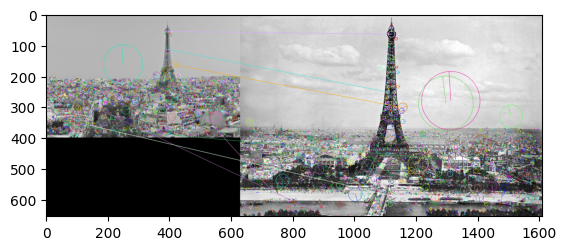

In [11]:
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [12]:
# write
cv2.imwrite('output.png', img3)

True